In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\youtube data analysis\Python_youtube_Analysis-master\g3.csv', on_bad_lines='skip')

C:\Users\Dell\AppData\Local\Temp\ipykernel_12308\2335227008.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\Dell\Desktop\youtube data analysis\Python_youtube_Analysis-master\g3.csv', on_bad_lines='skip')


In [3]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
df.shape

(691400, 4)

In [5]:
df.columns

Index(['video_id', 'comment_text', 'likes', 'replies'], dtype='object')

In [6]:
df['likes'].describe()

count     691400
unique      1284
top            0
freq      456894
Name: likes, dtype: int64

In [7]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [9]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.head(2)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0


In [12]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

### Perform Sentiment Analysis

In [13]:
!pip install textblob

In [23]:
from textblob import TextBlob

#### TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks, such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [24]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [25]:
df.shape

(691374, 4)

In [45]:
sample_df=df[0:1000]

In [27]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️	") #normal text

TextBlob("Logan Paul it's yo big day ‼️‼️‼️	")

In [28]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️	").sentiment #attribute

Sentiment(polarity=0.0, subjectivity=0.1)

In [29]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️	").sentiment.polarity

0.0

In [30]:
# polarity=[]--black list

# or comment in df['comment_text']:
#     TextBlob(comment).sentiment.polarity
#     polarity.append(TextBlob(comment).sentiment.polarity)
    
    
# if there is black txt then will get the exception error . so avoid the exception we have to use try exception block

# syntax 
# try:
#     Code that might raise an exception
# except :
#     Code to handle the exception


In [31]:
polarity = []

for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [32]:
len(polarity)

691374

In [33]:
df['polarity']=polarity

In [35]:
df.tail(10)

,video_id,comment_text,likes,replies,polarity
691390,EoejGgUNmVU,"Zajebistaa...jak zawsze,live super.",0,0,0.333333
691391,EoejGgUNmVU,Love you,0,0,0.500000
691392,EoejGgUNmVU,*L O S T O N Y O U*,1,0,0.000000
691393,EoejGgUNmVU,<3,0,0,1.000000
691394,EoejGgUNmVU,Amazing!!!!!💚🌹💕🔥,2,0,0.000000
691395,EoejGgUNmVU,Лучшая,1,0,0.000000
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0,0.000000
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0,0.000000
691398,EoejGgUNmVU,Islığı yeter...,0,0,0.000000
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0,0.000000


## Wordcloud Analysis of your data

In [36]:
##Word cloud analysis is a visualization technique used to represent the frequency of words in a text corpus

In [60]:
filter1=df['polarity']==1
comments_positive=df[filter1]
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [61]:
filter2=df['polarity']==-1
comments_negative=df[filter2]
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [62]:
!pip install wordcloud

In [63]:
from wordcloud import WordCloud , STOPWORDS

In [64]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [65]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [66]:
type(df['comment_text'])

pandas.core.series.Series

In [67]:
#we need it in string data type 

total_comments_positive=' '.join(comments_positive['comment_text'])

In [68]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive) #we need to remove stopwords from our string which dont acarry any significvant meaning

(-0.5, 399.5, 199.5, -0.5)

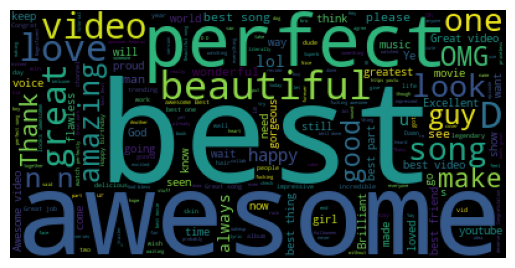

In [69]:
plt.imshow(wordcloud)
plt.axis('off')

## Conclusion -->> Positive Users are emphasizing more on best,awesome,perfect,great,happy etc more

In [70]:
#same for negative

In [72]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [74]:
comments_negative.shape

(3508, 5)

In [77]:
comments_negative['likes'].describe()

count     3508
unique      72
top          0
freq      2292
Name: likes, dtype: int64

In [78]:
#we need it in string
total_comments_negative=' '.join(comments_negative['comment_text'])

In [79]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

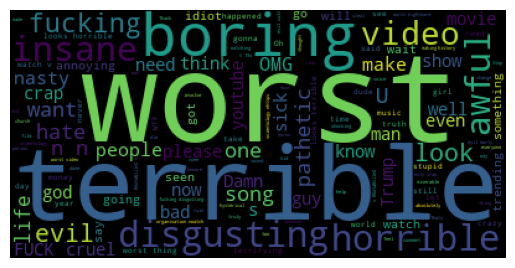

In [80]:
plt.imshow(wordcloud)
plt.axis('off')

## conclusion --> Negative comments are Worst, terrible,awful,disgusting....etc

# Emoji's analysis

In [81]:
!pip install emoji

  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/bd/48/508a980e9c9f12dbc2e45e57f027abdd92320e5be37c5c551588a86acb48/emoji-2.11.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/433.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/433.8 kB ? eta -:--:--
    --------------------------------------- 10.2/433.8 kB ? eta -:--:--
   -- ------------------------------------ 30.7/433.8 kB 217.9 kB/s eta 0:00:02
   -- ------------------------------------ 30.7/433.8 kB 217.9 kB/s eta 0:00:02
   ------ -------------------------------- 71.7/433.8 kB 357.2 kB/s eta 0:00:02
   ----------------- -------------------- 194.6/433.8 kB 737.3 kB/s eta 0:00:01
   -------------------- ----------------- 235.5/433.8 kB 846.9 kB/s eta 0:00:01
   --------------------------------- ------ 368.6/433.8 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------  430.1/433.8 kB 1.1 MB/s eta 0:00:01
   -----------------------

In [82]:
import emoji

In [83]:
emoji.__version__

'2.11.1'

In [84]:
df['comment_text'].head()

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: comment_text, dtype: object

In [86]:
#understand the emoji part
comment= 'trending 😉'

In [88]:
[char for char in comment if char in emoji.EMOJI_DATA]  ## to extract the emoji from our data

['😉']

In [92]:
emoji_list=[]

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)
        
emoji_list

['😉']

In [97]:
#similarly we will store for whole dataset

all_emoji_list=[]

for comment in df['comment_text'].dropna():##in case of misssing values
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)
            

    

In [96]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [98]:
## We need to compute frequencies of each and every emoji in "all_emoji_list"

In [100]:
from collections import Counter #collection package


In [101]:
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [102]:
Counter(all_emoji_list).most_common(10)[0]

('😂', 36987)

In [103]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [104]:
Counter(all_emoji_list).most_common(10)[0][1]

36987

In [105]:
Counter(all_emoji_list).most_common(10)[1][0]

'😍'

In [107]:
Counter(all_emoji_list).most_common(10)[2][0]

'❤'

In [111]:
Counter(all_emoji_list).most_common(10)[0][1]

36987

In [112]:
Counter(all_emoji_list).most_common(10)[1][1]

33453

In [113]:
Counter(all_emoji_list).most_common(10)[2][1]

31119

In [117]:
freqs = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [119]:
emojis = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [120]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [122]:
import plotly.io as pio
pio.renderers.default='iframe_connected'

In [123]:
import plotly.graph_objs as go
from plotly.offline import iplot  
#use this if your chart is not displaying 
#Plotly is configured to display plots correctly.

In [124]:
trace = go.Bar(x=emojis , y=freqs)

In [125]:
iplot([trace])

## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

# Collect Entire data of Youtube !


In [126]:
import os

In [129]:
files=os.listdir(r'C:\Users\Dell\Desktop\youtube data analysis\Python_youtube_Analysis-master\YT_additional_data')

In [130]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'README.md',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [132]:
##extracting csv files from above likst..
files_csv=[file for file in files if '.csv' in file]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [133]:
#while colllecting the data if you encounter any kind of warning its always good to consider a warning modules.
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [135]:
##All the csv files need to be stored in big dataframe
full_df=pd.DataFrame()
path=r'C:\Users\Dell\Desktop\youtube data analysis\Python_youtube_Analysis-master\YT_additional_data'
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1')
    full_df = pd.concat([full_df, current_df], ignore_index=True)
   

In [136]:
## As encoding will leave the lines with errors

In [137]:
full_df.shape

(375942, 16)

In [139]:
full_df.duplicated() ## False:unique vcalues, True:duplicate values

0         False
1         False
2         False
3         False
4         False
          ...  
375937     True
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [140]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [145]:
full_df=full_df.drop_duplicates() ##drop duplicates

In [146]:
full_df.shape

(339525, 16)

In [147]:
### Storing data in csv files
full_df[0:1000].to_csv(r'C:\Users\Dell\Desktop\youtube data analysis\Export_data/youtube_sample.csv' , index=False)

In [150]:
#### b... Storing data into json
full_df[0:1000].to_json(r'C:\Users\Dell\Desktop\youtube data analysis\youtube_sample.json')

### JSON (JavaScript Object Notation) is a lightweight data-interchange format that is easy for humans to read and write, and easy for machines to parse and generate. It's commonly used for transmitting data between a server and a web application, but it's also frequently used for data storage and configuration files.

# Which category has the max likes?

In [151]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [154]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [155]:
##REad json files

In [160]:
json_df=pd.read_json(r'C:\Users\Dell\Desktop\youtube data analysis\Python_youtube_Analysis-master\YT_additional_data\US_category_id.json')

In [162]:
json_df.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [163]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [164]:
#now i want id and title in a dictionary  
cat_dict = {} #empty dict 


for item in json_df['items'].values:     #values here return the array representation 
    ## cat_dict[key] = value (Syntax to insert key:value in dictionary)
    cat_dict[int(item['id'])] = item['snippet']['title'] # snippet here is the sub dict so we have to write this way  ['snippet']['title']

In [165]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [166]:
##MAP
full_df['category_name'] = full_df['category_id'].map(cat_dict) 
full_df['category_name']
#maps category IDs in the 'category_id' column of full_df DataFrame to their corresponding category titles using the cat_dict dictionary.

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
                ...       
375936      People & Blogs
375938      People & Blogs
375939       Entertainment
375940    Film & Animation
375941              Gaming
Name: category_name, Length: 339525, dtype: object

In [167]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


In [168]:
##which category has the max likes?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

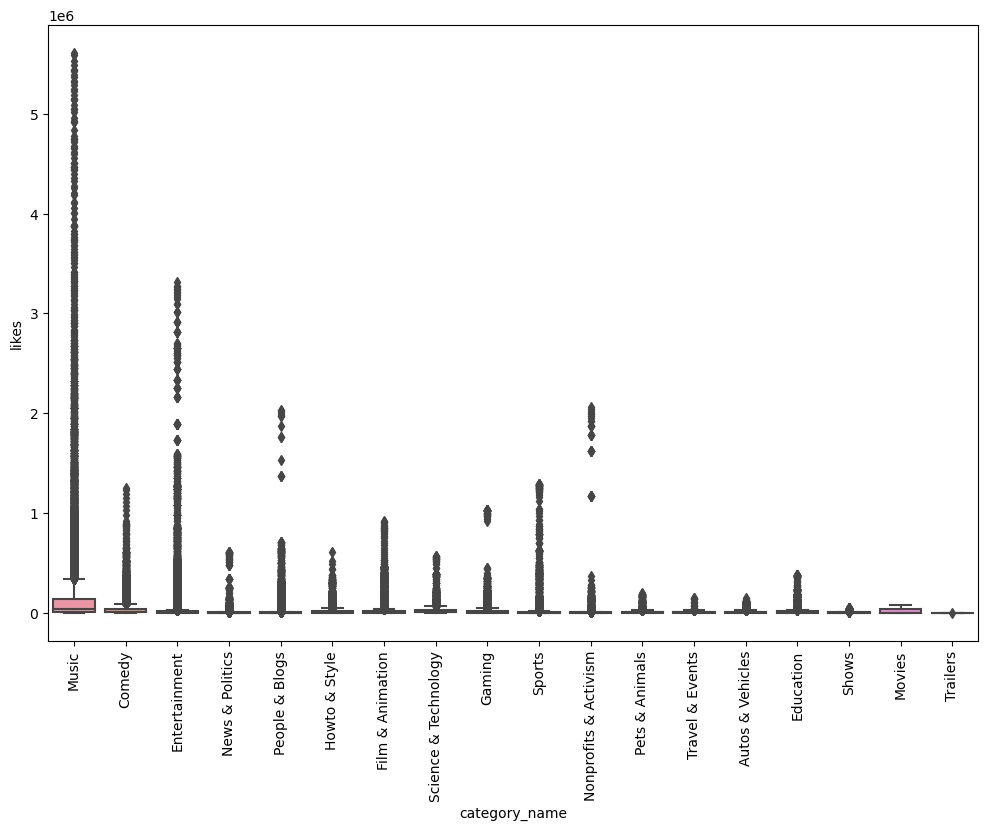

In [169]:
plt.figure(figsize=(12,8))#Creates a new figure with a specified size of 12 inches by 8 inches for better visualization.
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')#Rotates the x-axis labels vertically for better readability.

## find out whether audience is engaged or not ?

In [171]:
(full_df['likes']/full_df['views'])*100

0          4.589104
1         12.594873
2          4.575843
3          6.309630
4          4.874563
            ...    
375936     7.820293
375938     5.635623
375939     4.507286
375940     3.408645
375941     3.464728
Length: 339525, dtype: float64

In [172]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [173]:
full_df.columns # three things added 'like_rate','dislike_rate', 'comment_count_rate'

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

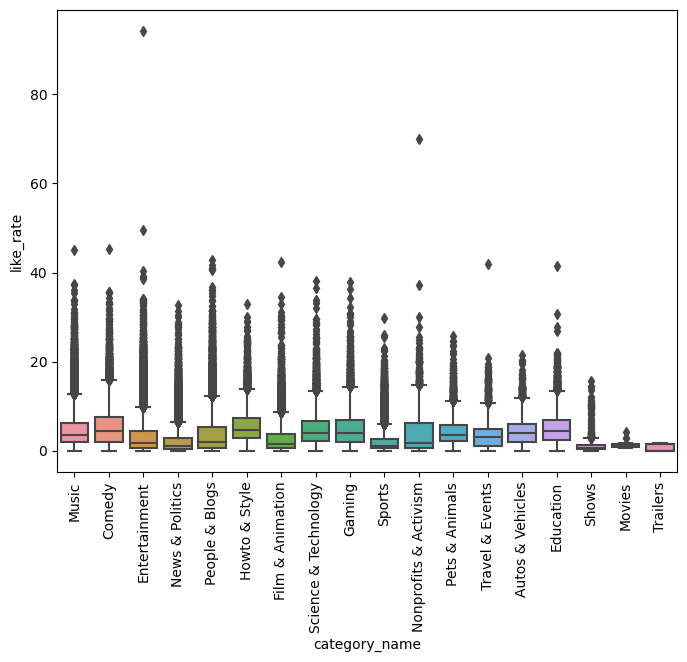

In [174]:
#creating box plot for like rate
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

### Analysing Relationship between Views and Likes

<Axes: xlabel='views', ylabel='likes'>

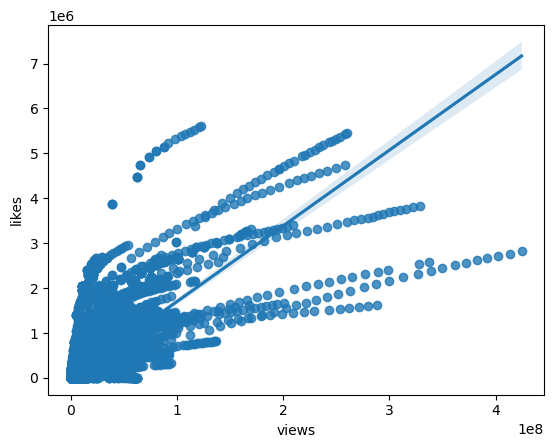

In [176]:
#using Regression plot
#regression plot is nothing but it is the combination of a scatter plot + a regression kine on top of that
sns.regplot(x='views' , y='likes' , data = full_df)

#### it seems that there is straight line it means views will increase my like will also icrease in a same way.
its is cocept of correlation

In [178]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [179]:
full_df[['views', 'likes', 'dislikes']]

,views,likes,dislikes
0,17158579,787425,43420
1,1014651,127794,1688
2,3191434,146035,5339
3,2095828,132239,1989
4,33523622,1634130,21082
...,...,...,...
375936,8259128,645888,4052
375938,1064798,60008,382
375939,1066451,48068,1032
375940,5660813,192957,2846


In [180]:
full_df[['views', 'likes', 'dislikes']].corr() ### finding co-relation values between ['views', 'likes', 'dislikes']

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

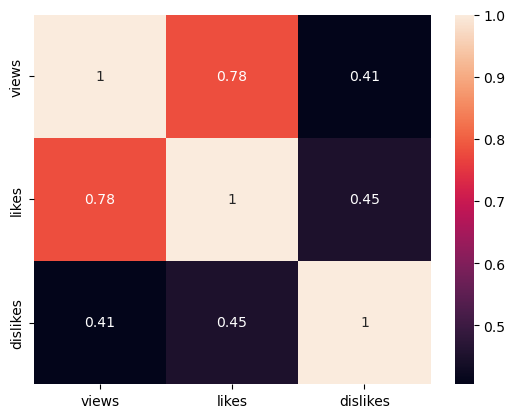

In [181]:
#Now if you want to showcase this correlation table in a vsiualized way , you can use the heatmap
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True) 
#When annot=True, numerical values are displayed on the heatmap cells

# Which channels have the largest number of trending videos?

In [182]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,âº Follow for News! - https://twitter.com/KEE...,News & Politics,7.922049,0.352218,0.927160


In [183]:
full_df['channel_title'].value_counts() 
# returns the count of unique values in a Series, providing a frequency distribution of the values.

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: count, Length: 37824, dtype: int64

In [184]:
### lets obtain above frequency table using groupby approach : 
full_df.groupby(['channel_title']).size()

channel_title
! ì¸ìì ë¬´ì¨ì¼ì´                   7
!!8æã ãé¢ç½ãã¿å¤§éå          1
!BTSã»TWICE ã¾ã¨ã                     1
!Los amorosos ViralesÂ¡                    2
!t Live                                    3
                                          ..
ï¼åã§ã§ãã DIY                     5
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½                         2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã    1
ï¼·ï¼¡ï¼ªï¼¯ï¼©ï¼«ï¼¡                      2
ðSandrea                                2
Length: 37824, dtype: int64

In [185]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index() 


#reset_index() is a pandas DataFrame method used to reset the index of a DataFrame. 
#It converts the index labels into a new column and assigns a default numeric index to the DataFrame.

In [186]:
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [187]:
cdf = cdf.rename(columns={0:'total_videos'})

In [188]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [189]:
import plotly.express as px

In [190]:
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')

##  Which channels have the largest number of trending videos?

# This Analysis Project shows and analyses the Youtube Algorithm at a broader sense and helps in giving the overviews of trendig contents which should be uploaded or on what content one should focus and also what improvements one needs to do and in which area.so this analysis will be of great help